# Environment Setup:

In [6]:
%pip install ../dist/perceiver_io-0.6.0-py3-none-any.whl
%pip install matplotlib
%pip install termcolor
%pip install "ipywidgets>=7,<8"

Processing /home/jimcarty/code/l4_amos_project/src/perceiver-io/dist/perceiver_io-0.6.0-py3-none-any.whl
perceiver-io is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import torch

from PIL import Image

# The perceiver-io library can use model configurations 
# and pretrained model parameters from the Hugging Face Hub.
from transformers import AutoConfig

# MNIST:

In [8]:
from torchvision.datasets import MNIST
from perceiver.data.image import MNISTPreprocessor

mnist = MNIST(root='.cache', download=True, train=False)
mnist_preproc = MNISTPreprocessor()

In [9]:
from perceiver.model.image.classifier import LitImageClassifier

ckpt = '../logs/img_clf/version_0/checkpoints/epoch=018-val_loss=0.062.ckpt'

# Load the PyTorch Lightning module of the image classifier from a checkpoint
model = LitImageClassifier.load_from_checkpoint(ckpt).model.eval()

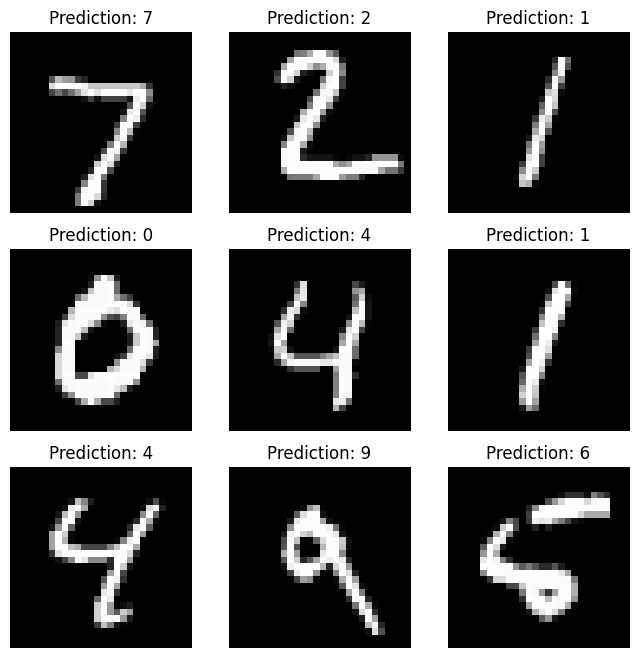

In [10]:
cols, rows = 3, 3
imgs = [mnist[i][0] for i in range(cols * rows)]

with torch.no_grad():
    inputs = mnist_preproc.preprocess_batch(imgs)
    logits = model(inputs)
    preds = logits.argmax(dim=1)
    
plt.figure(figsize=(8, 8))
for i, (img, pred) in enumerate(zip(imgs, preds)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(f'Prediction: {pred}')
    plt.imshow(np.array(img), cmap='gray')    

# Segmentation: